## Object Detection using Faster R-CNN ##

Caution: modify the path ```/content/drive/My Drive/detection-in-keras-using-faster-r-cnnn``` in the lines of code of this file, according to your path in Drive. Eg: if the location of your folder is in the main path of your Google Drive under the name ```faster-r-cnn-colab```, then modify the last path to: ```/content/drive/My Drive/faster-r-cnn-colab```

### Preparing Libraries ###

In [ ]:
# first Runtime > Factory Reset Runtime
# then click on Reconect, wait until reconection finish
# then run this block
# then Runtime > Restart Runtime, wait until reconection finish
# then run agin this block

!pip install tensorflow-gpu==1.15
!pip install keras==2.1.5

In [ ]:
# install additional libraries
!pip install h5py
!pip install numpy
!pip install opencv-python
!pip install sklearn

In [ ]:
import tensorflow
import keras
tensorflow.test.gpu_device_name()

# if the GPU works OK, it should print something like:
# /device:GPU:0

Using TensorFlow backend.


'/device:GPU:0'

In [ ]:
print(tensorflow.__version__)
print(keras.__version__)

# should print something like:
# 1.15.0
# 2.1.5

1.15.0
2.1.5


### Connecting to Drive ###

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
folder_location = "/content/drive/My Drive/detection-in-keras-using-faster-r-cnn/"
dataset_location = "/tmp/dataset-blood-cells/"

### Load Dataset ###

In [ ]:
!wget --no-check-certificate \
    -r 'https://docs.google.com/uc?export=download&id=1TVx7005znK0QgK-prd5maH5BJmHpf2Wq' \
    -O /tmp/dataset-blood-cells.zip


will be placed in the single file you specified.

--2020-08-29 21:23:11--  https://docs.google.com/uc?export=download&id=1TVx7005znK0QgK-prd5maH5BJmHpf2Wq
Resolving docs.google.com (docs.google.com)... 172.217.204.138, 172.217.204.139, 172.217.204.100, ...
Connecting to docs.google.com (docs.google.com)|172.217.204.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-5g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/m9lhhoat9kforc88f724j72ddmraklbi/1598736150000/02133894314206366517/*/1TVx7005znK0QgK-prd5maH5BJmHpf2Wq?e=download [following]
--2020-08-29 21:23:12--  https://doc-0o-5g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/m9lhhoat9kforc88f724j72ddmraklbi/1598736150000/02133894314206366517/*/1TVx7005znK0QgK-prd5maH5BJmHpf2Wq?e=download
Resolving doc-0o-5g-docs.googleusercontent.com (doc-0o-5g-docs.googleusercontent.com)... 142.250.98.132, 2607:f8b0:400c:c1a::84
Connectin

In [ ]:
import os
import zipfile

local_zip = '/tmp/dataset-blood-cells.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

### Train ###

If you want to use with your own dataset, modify the train_images.txt file according your drive path. Eg:
```
...
/tmp/dataset-blood-cells/train_images/BloodImage_00001.jpg,68,315,286,480,WBC
/tmp/dataset-blood-cells/train_images/BloodImage_00001.jpg,346,361,446,454,RBC
/tmp/dataset-blood-cells/train_images/BloodImage_00001.jpg,53,179,146,299,RBC
/tmp/dataset-blood-cells/train_images/BloodImage_00001.jpg,449,400,536,480,RBC
...
```


In [ ]:
import sys
import os

sys.path.append(os.path.abspath(folder_location))

import train_frcnn

from train_frcnn import *


In [ ]:
training(train_path = dataset_location+"train_images.txt",
         input_weight_path = "",
         parser = "simple",
         num_rois = 32,
         network = "resnet50",
         horizontal_flips = False,
         vertical_flips = False,
         rot_90 = False,
         num_epochs = 2,
         config_filename = folder_location+"config.pickle",
         output_weight_path = folder_location+"model_frcnn.hdf5")

Parsing annotation files
Training images per class:
{'Platelets': 209, 'RBC': 2382, 'WBC': 214, 'bg': 0}
Num classes (including bg) = 4
Config has been written to /content/drive/My Drive/detection-in-keras-using-faster-r-cnn/config.pickle, and can be loaded when testing to ensure correct results
Num train samples 173
Num val samples 32







loading weights from resnet50_weights_tf_dim_ordering_tf_kernels.h5
Could not load pretrained model weights. Weights can be found in the keras application folder       https://github.com/fchollet/keras/tree/master/keras/applications


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Starting training
Epoch 1/2








1000/1000 [==============================] - 1132s 1s/step - rpn_cls: 2.2500 - rpn_regr: 0.1106 - detector_cls: 0.4492 - detector_regr: 0.2654
Mean number of bounding boxes from RPN overlapping ground truth boxes: 30.891434262948206
Classifier accuracy for bounding boxes from RPN: 0.787968

### Test ###

In [ ]:
import sys
import os

sys.path.append(os.path.abspath(folder_location))

import test_frcnn

from test_frcnn import *


In [ ]:
testing(test_path = dataset_location+"test_images",
        num_rois = 32,
        config_filename = folder_location+"config.pickle",
        network = "resnet50",
        weigths_file = folder_location+"model_frcnn.hdf5",
        output_folder = dataset_location+"test_images_result/")

{0: 'WBC', 1: 'RBC', 2: 'Platelets', 3: 'bg'}
Loading weights from /content/drive/My Drive/detection-in-keras-using-faster-r-cnn/model_frcnn.hdf5
BloodImage_00000.jpg
Elapsed time = 5.656726598739624
[('RBC', 97.3897635936737), ('RBC', 93.57370734214783), ('RBC', 90.93843698501587), ('RBC', 89.18657898902893), ('RBC', 89.03628587722778), ('RBC', 81.74691796302795), ('RBC', 81.3777506351471), ('WBC', 99.1790771484375)]
BloodImage_00001.jpg
Elapsed time = 0.5015389919281006
[('RBC', 98.36474061012268), ('RBC', 97.93263673782349), ('RBC', 97.92330861091614), ('RBC', 91.58506989479065), ('RBC', 91.19841456413269), ('RBC', 91.08915328979492), ('RBC', 90.92982411384583), ('RBC', 88.71908783912659), ('RBC', 88.6198341846466), ('RBC', 87.28947043418884), ('RBC', 83.72852206230164), ('WBC', 99.37580823898315), ('WBC', 80.14431595802307)]
BloodImage_00002.jpg
Elapsed time = 0.4973592758178711
[('RBC', 94.56093311309814), ('RBC', 93.99417638778687), ('RBC', 91.02658033370972), ('RBC', 89.58398103

### Visualization ###

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

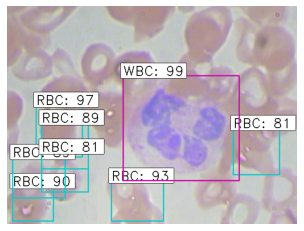

In [ ]:
img=mpimg.imread(dataset_location+"test_images_result/0.png")
plt.imshow(img, cmap = 'gray')
plt.axis('off')
plt.show()

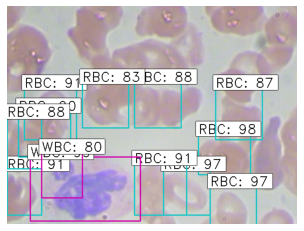

In [ ]:
img=mpimg.imread(dataset_location+"test_images_result/1.png")
plt.imshow(img, cmap = 'gray')
plt.axis('off')
plt.show()

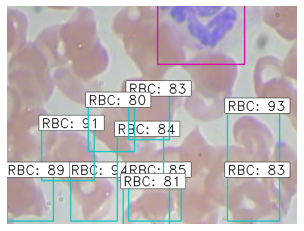

In [ ]:
img=mpimg.imread(dataset_location+"test_images_result/2.png")
plt.imshow(img, cmap = 'gray')
plt.axis('off')
plt.show()